In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#file locations
directors_file = "files/imbd_files/directors.csv"
known_for_file= "files/imbd_files/known_for.csv"
movie_akas_file = "files/imbd_files/movie_akas.csv"
movie_basics_file = "files/imbd_files/movie_basics.csv"
movie_ratings_file= "files/imbd_files/movie_ratings.csv"
persons_file = "files/imbd_files/persons.csv"
principals_file= "files/imbd_files/principals.csv"
writers_file = "files/imbd_files/writers.csv"

# read files into dataframes
directors = pd.read_csv(directors_file)
known_for = pd.read_csv(known_for_file)
movie_akas = pd.read_csv(movie_akas_file)
movie_basics = pd.read_csv(movie_basics_file)
movie_ratings = pd.read_csv(movie_ratings_file)
persons = pd.read_csv(persons_file)
principals = pd.read_csv(principals_file)
writers = pd.read_csv(writers_file)

# list of tables for reference
movie_df_list = ['directors', 'known_for', 'movie_akas', 'movie_basics', 'movie_ratings', 'persons', 'principals', 'writers']

In [3]:
movie_df_list

['directors',
 'known_for',
 'movie_akas',
 'movie_basics',
 'movie_ratings',
 'persons',
 'principals',
 'writers']

In [4]:
# merge movie ratings with movie basics
movie_info = pd.merge(movie_basics, movie_ratings, how="inner", on='movie_id')

In [5]:
movie_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
# movies sort by most votes and avereage rating
top_movies = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 100 movies selected
top_100_movies = top_movies.iloc[:100]
# top 100 movies sorted specifically by movie rating
top_100_movies = top_100_movies.sort_values(by='averagerating', ascending=False)
#index reseted for top 100 movies
top_100_movies = top_100_movies.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_100_movies = top_100_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})
top_100_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         100 non-null    object 
 1   primary_title    100 non-null    object 
 2   original_title   100 non-null    object 
 3   start_year       100 non-null    int64  
 4   runtime_minutes  100 non-null    float64
 5   genres           100 non-null    object 
 6   avg_rating       100 non-null    float64
 7   num_votes        100 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


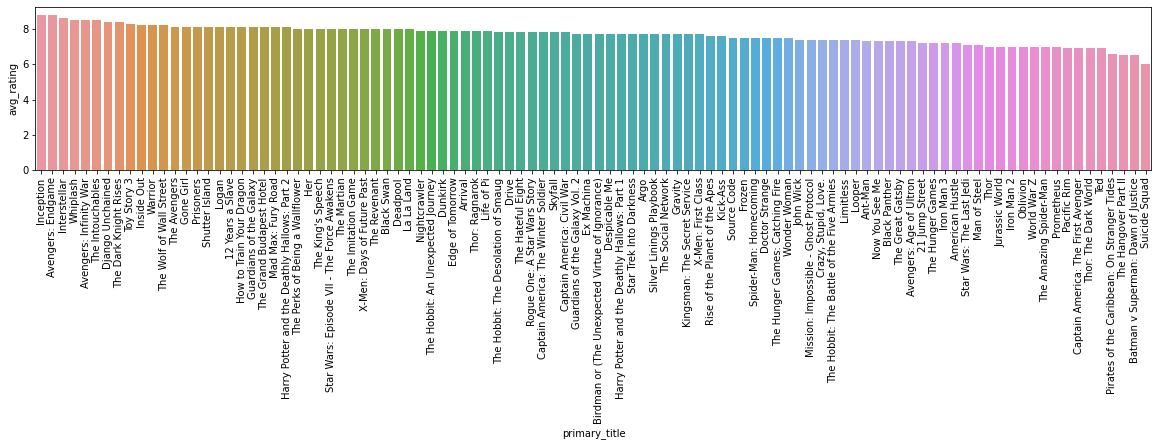

In [7]:
# bar plot for average rating of top 100 movies 
plt.figure(figsize = (20,3))
plt.xticks(rotation = 90)
sns.barplot(x=top_100_movies.primary_title, y=top_100_movies.avg_rating);

In [8]:
# merge movie directors with top 100 movies
top_movie_dir = pd.merge(top_100_movies, directors, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_movie_dir = pd.merge(top_movie_dir, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_movie_dir = top_movie_dir.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_movie_dir.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
2,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
3,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
4,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan


In [9]:
# count of directors in top 100 movies
top_directors = top_movie_dir.primary_name.value_counts()
top_directors.head()

Anthony Russo     30
Joe Russo         30
James Gunn        24
Matthew Vaughn    16
Peter Jackson     15
Name: primary_name, dtype: int64

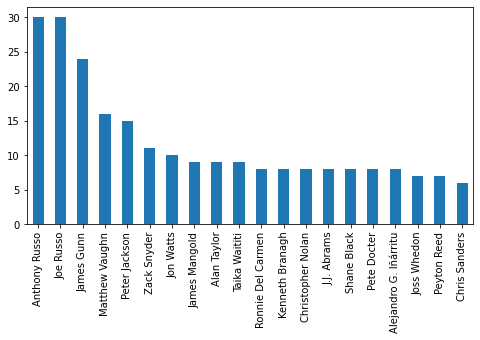

In [10]:
# bar plot of 20 top directors based on count in top 100 movies
top_directors.head(20).plot(kind='bar', figsize=(8, 4));

In [11]:
# merge movie writers with top 100 movies
top_writers = pd.merge(top_100_movies, writers, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_writers = pd.merge(top_writers, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_writers = top_writers.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_writers.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
2,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
3,tt5013056,Dunkirk,7.9,466580,nm0634240,Christopher Nolan
4,tt0770828,Man of Steel,7.1,647288,nm0634240,Christopher Nolan


In [12]:
# count of directors in top 100 movies
top_writers = top_writers.primary_name.value_counts()
top_writers.head()

Jack Kirby            21
Stan Lee              18
Stephen McFeely       10
Christopher Markus    10
Larry Lieber           9
Name: primary_name, dtype: int64

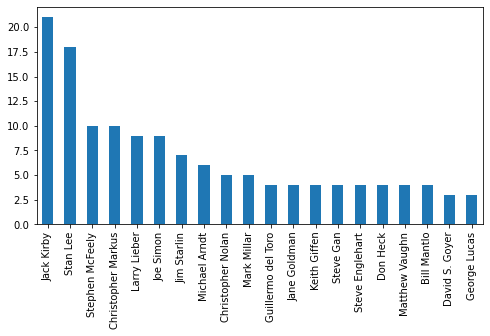

In [13]:
# bar plot of 20 top writers based on count in top 100 movies
top_writers.head(20).plot(kind='bar', figsize=(8, 4));

In [14]:
# merge movie principals with top 100 movies
top_principals= pd.merge(top_100_movies, principals, how="inner", on='movie_id')
# merge persons with top principals table to get principal names
top_principals = pd.merge(top_principals, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_principals = top_principals.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title', 'job', 'characters'])

In [15]:
# filter top principals to get top principal actors
top_principal_actors = top_principals[top_principals.category == 'actor']
top_principal_actors.head()

,movie_id,primary_title,avg_rating,num_votes,ordering,person_id,category,primary_name
1,tt1375666,Inception,8.8,1841066,1,nm0000138,actor,Leonardo DiCaprio
2,tt1853728,Django Unchained,8.4,1211405,3,nm0000138,actor,Leonardo DiCaprio
3,tt0993846,The Wolf of Wall Street,8.2,1035358,1,nm0000138,actor,Leonardo DiCaprio
4,tt1130884,Shutter Island,8.1,1005960,1,nm0000138,actor,Leonardo DiCaprio
5,tt1663202,The Revenant,8.0,621193,1,nm0000138,actor,Leonardo DiCaprio


In [16]:
# count of principal actor appearing in top 100 movies
top_actors = top_principal_actors.primary_name.value_counts()
top_actors.head()

Robert Downey Jr.    8
Chris Evans          7
Leonardo DiCaprio    6
Chris Hemsworth      6
Mark Ruffalo         6
Name: primary_name, dtype: int64

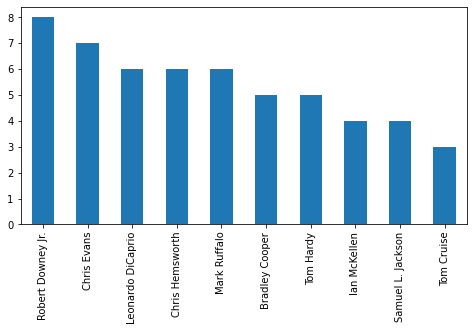

In [17]:
# bar plot of top 10 actors based on number of times they appear in the top 100 movies
top_actors.head(10).plot(kind='bar', figsize=(8, 4));

In [18]:
string_split = top_100_movies

In [37]:
# splitting genre values into new columns
genre_split = string_split["genres"].str.split(",", n = 3, expand = True)
# concatination genre columns into 1 series
top_100_movies_genres = pd.concat([genre_split[0], genre_split[1], genre_split[2]])
# drop na from genre series
top_100_movies_genres = top_100_movies_genres.dropna()
# counting genre counts in top 100 movie list
top_genre_counts = top_100_movies_genres.value_counts()
top_genre_counts

Adventure    57
Action       54
Drama        36
Sci-Fi       36
Comedy       20
Fantasy      16
Thriller     13
Mystery      11
Crime        11
Biography     8
Animation     5
Romance       4
History       3
Family        2
Music         2
Western       1
Horror        1
Sport         1
dtype: int64

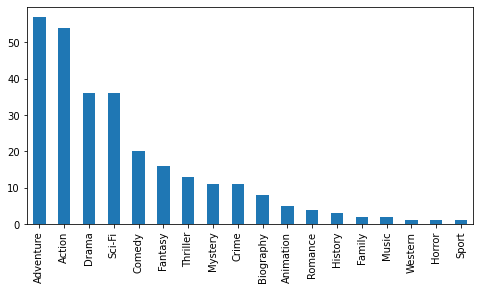

In [38]:
# bar plot of top genre counts from top 100 movies
top_genre_counts.plot(kind='bar', figsize=(8, 4));